In [1]:
pip install --upgrade seaborn

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.9/294.9 kB 5.5 MB/s eta 0:00:00
  Attempting uninstall: seaborn
    Found existing installation: seaborn 0.12.2
    Uninstalling seaborn-0.12.2:
      Successfully uninstalled seaborn-0.12.2
Note: you may need to restart the kernel to use updated packages.


# Imports 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import random
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import TensorDataset, DataLoader
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import warnings
warnings.filterwarnings("ignore", message=".*use_inf_as_na.*")

In [3]:
df=pd.read_csv("/kaggle/input/heart-disease-cleveland-uci/heart_cleveland_upload.csv")
df.head(10)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
5,64,1,0,170,227,0,2,155,0,0.6,1,0,2,0
6,63,1,0,145,233,1,2,150,0,2.3,2,0,1,0
7,61,1,0,134,234,0,0,145,0,2.6,1,2,0,1
8,60,0,0,150,240,0,0,171,0,0.9,0,0,0,0
9,59,1,0,178,270,0,2,145,0,4.2,2,0,2,0


In [4]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


# Handling nulls and duplicates

In [6]:
#checking for nulls and duplicates
print(f"Number of nulls: {df.isnull().sum().sum()}")
print(f"Number of duplicates: {df.duplicated().sum()}")

Number of nulls: 0
Number of duplicates: 0


In [7]:
#Display data types of each column
print("\n Column Data Types:\n", df.dtypes)
# No Encoding Needed
# All features, including categorical ones like sex, cp, thal, slope, fbs, and restecg, are already encoded as integers.


 Column Data Types:
 age            int64
sex            int64
cp             int64
trestbps       int64
chol           int64
fbs            int64
restecg        int64
thalach        int64
exang          int64
oldpeak      float64
slope          int64
ca             int64
thal           int64
condition      int64
dtype: object


# **Outliers**

In [8]:
# Define the categorical and numerical columns
categorical_cols = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'condition']
numerical_cols = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create a figure for exploratory data analysis
plt.figure(figsize=(15, 10))

# Plot histograms for numerical features to understand their distributions
plt.suptitle('Distribution of Numerical Features', fontsize=16)
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('numerical_distributions.png')
plt.close()

# Let's look at the boxplots to identify potential outliers
plt.figure(figsize=(15, 10))
plt.suptitle('Boxplots of Numerical Features (Before Outlier Treatment)', fontsize=16)
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('boxplots_before.png')
plt.close()

# Function to detect outliers using IQR method
def detect_outliers_iqr(df, col):
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
    return outliers, lower_bound, upper_bound

# Let's detect outliers for each numerical feature
outliers_info = {}
for col in numerical_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    outliers_info[col] = {
        'outliers_count': len(outliers),
        'percentage': (len(outliers) / len(df)) * 100,
        'lower_bound': lower_bound,
        'upper_bound': upper_bound
    }

# Display outlier information
print("\nOutlier Information using IQR Method:")
for col, info in outliers_info.items():
    print(f"{col}: {info['outliers_count']} outliers ({info['percentage']:.2f}%), Lower Bound: {info['lower_bound']:.2f}, Upper Bound: {info['upper_bound']:.2f}")


Outlier Information using IQR Method:
age: 0 outliers (0.00%), Lower Bound: 28.50, Upper Bound: 80.50
trestbps: 9 outliers (3.03%), Lower Bound: 90.00, Upper Bound: 170.00
chol: 5 outliers (1.68%), Lower Bound: 113.50, Upper Bound: 373.50
thalach: 1 outliers (0.34%), Lower Bound: 83.50, Upper Bound: 215.50
oldpeak: 5 outliers (1.68%), Lower Bound: -2.40, Upper Bound: 4.00


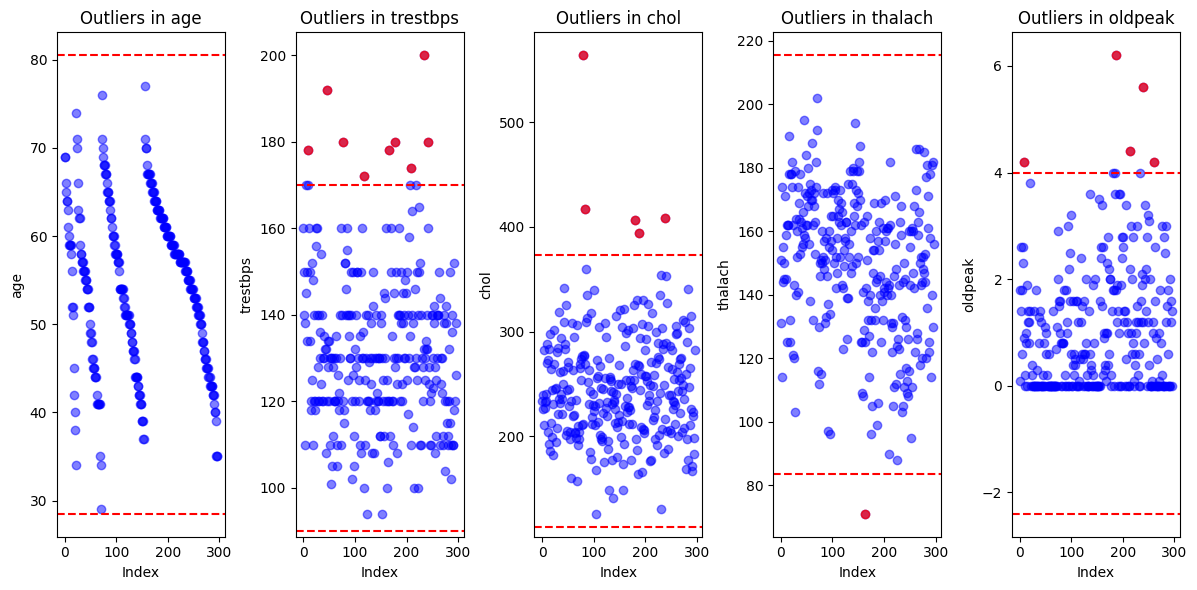

In [9]:
# visualize the outliers for one of the features with most outliers
plt.figure(figsize=(12, 6))
for col in numerical_cols:
    outliers, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    plt.subplot(1, len(numerical_cols), numerical_cols.index(col) + 1)
    plt.scatter(df.index, df[col], c='blue', alpha=0.5)
    plt.scatter(outliers.index, outliers[col], c='red', alpha=0.7)
    plt.axhline(y=lower_bound, color='r', linestyle='--')
    plt.axhline(y=upper_bound, color='r', linestyle='--')
    plt.title(f'Outliers in {col}')
    plt.xlabel('Index')
    plt.ylabel(col)
plt.tight_layout()
plt.savefig('outliers_visualization.png')
plt.show()

In [10]:
# Create a copy of the original dataframe to cap the outliers
df_capped = df.copy()

In [11]:
def cap_outliers(df, col, lower_bound, upper_bound):
    df_capped = df.copy()
    
    # Convert to float to avoid dtype incompatibility
    df_capped[col] = df_capped[col].astype(float)
    
    # Cap the outliers
    df_capped.loc[df_capped[col] < lower_bound, col] = lower_bound
    df_capped.loc[df_capped[col] > upper_bound, col] = upper_bound
    
    return df_capped

In [12]:
# Function to cap outliers
def cap_outliers(df, col, lower_bound, upper_bound):
    df_capped = df.copy()
    df_capped.loc[df_capped[col] < lower_bound, col] = lower_bound
    df_capped.loc[df_capped[col] > upper_bound, col] = upper_bound
    return df_capped

# Apply capping to numerical features
for col in numerical_cols:
    _, lower_bound, upper_bound = detect_outliers_iqr(df, col)
    df_capped = cap_outliers(df_capped, col, lower_bound, upper_bound)

/tmp/ipykernel_13/2104649695.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '28.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[df_capped[col] < lower_bound, col] = lower_bound
/tmp/ipykernel_13/2104649695.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '113.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[df_capped[col] < lower_bound, col] = lower_bound
/tmp/ipykernel_13/2104649695.py:4: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '83.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  df_capped.loc[df_capped[col] < lower_bound, col] = lower_bound


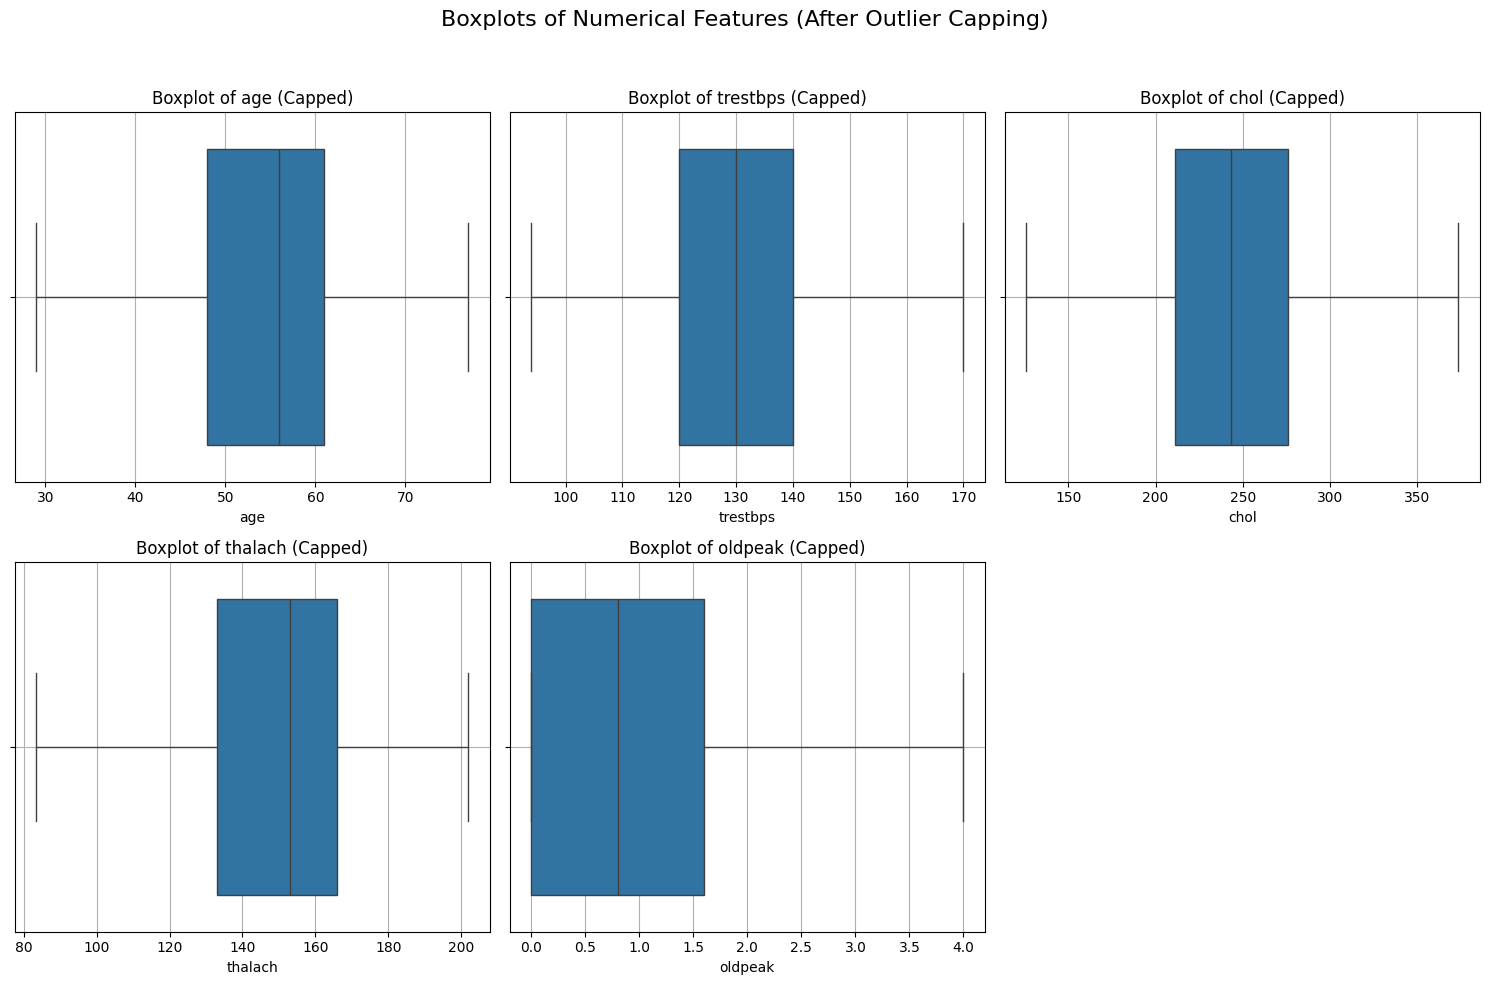

In [13]:
# Visualize the boxplots after capping
plt.figure(figsize=(15, 10))
plt.suptitle('Boxplots of Numerical Features (After Outlier Capping)', fontsize=16)
for i, col in enumerate(numerical_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=df_capped[col])
    plt.title(f'Boxplot of {col} (Capped)')
    plt.grid(True)
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('boxplots_after.png')
plt.show()

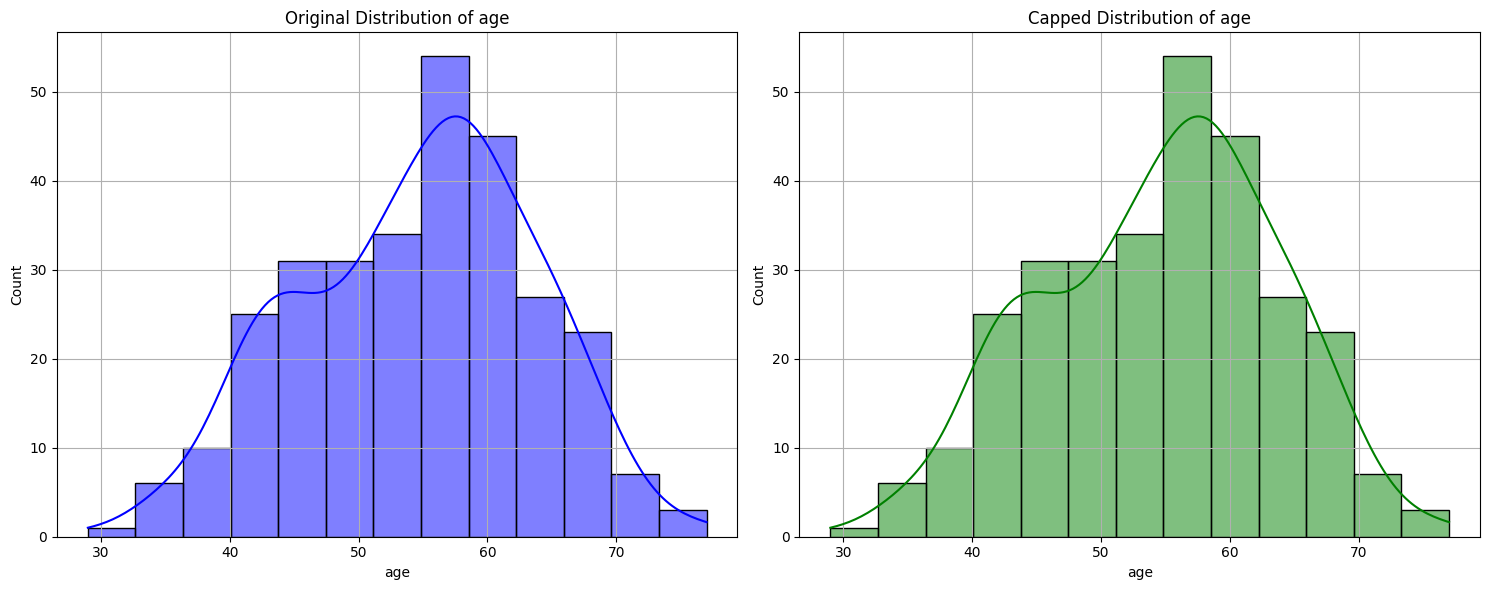

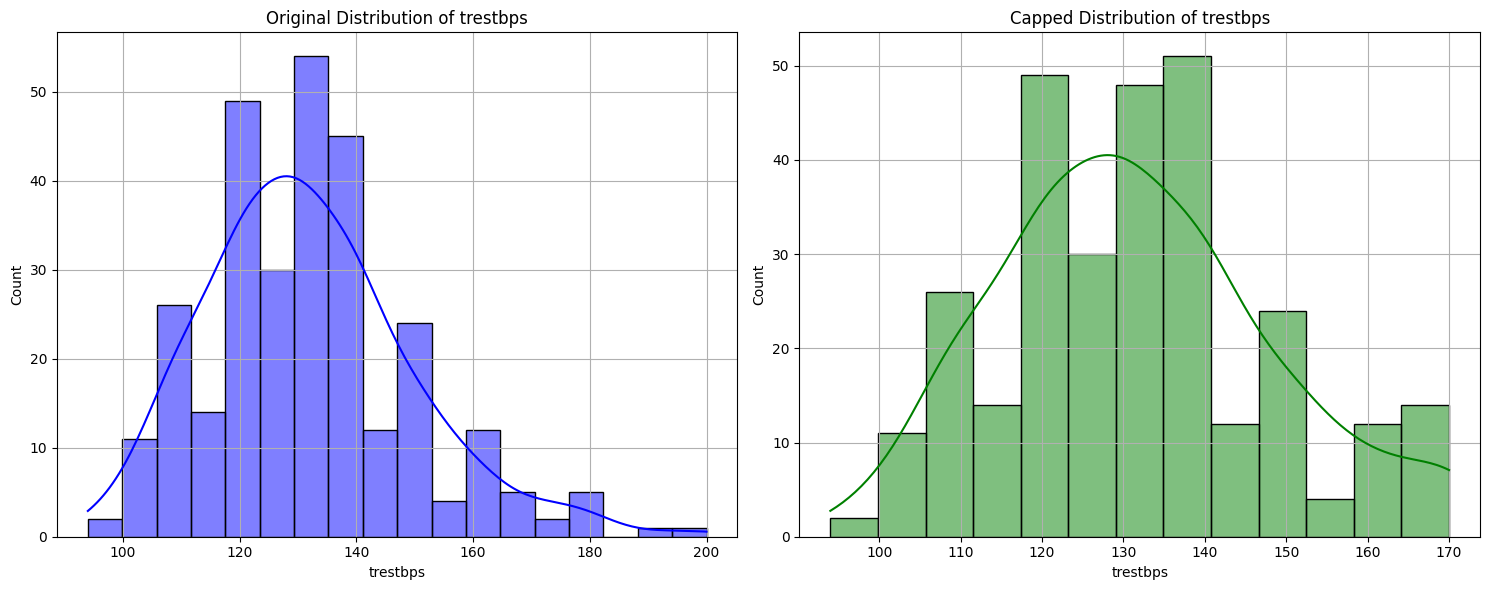

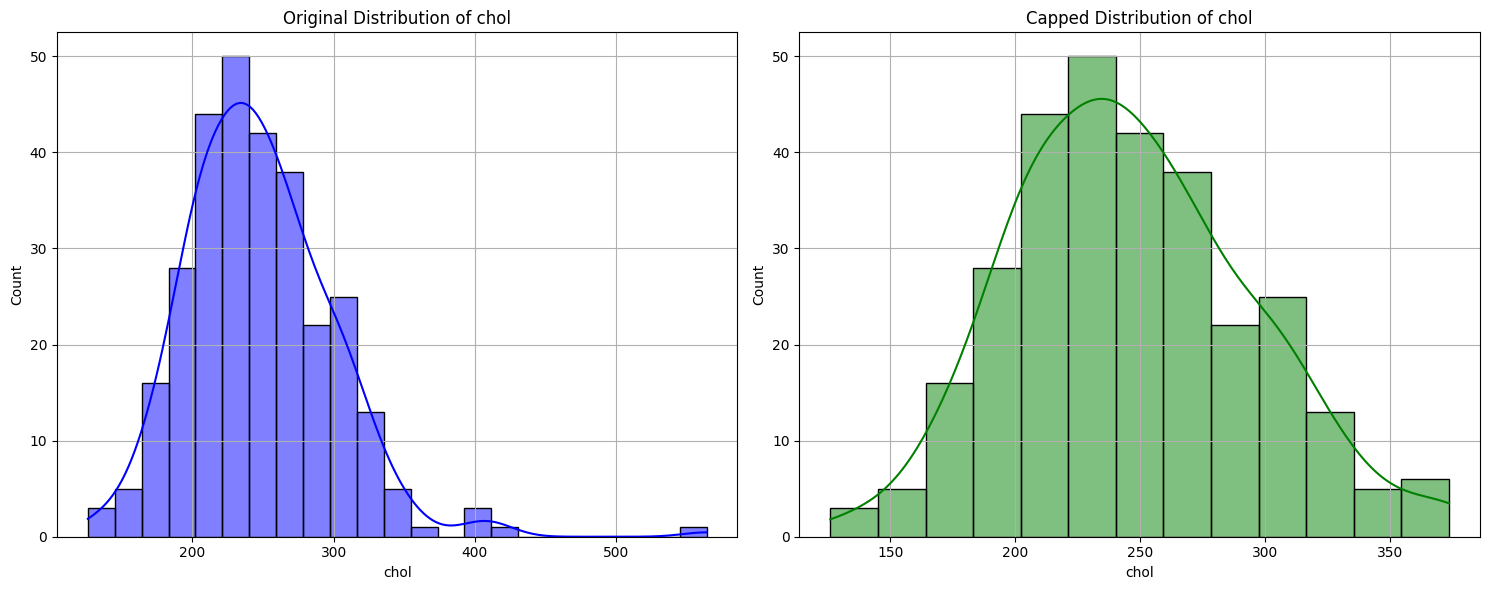

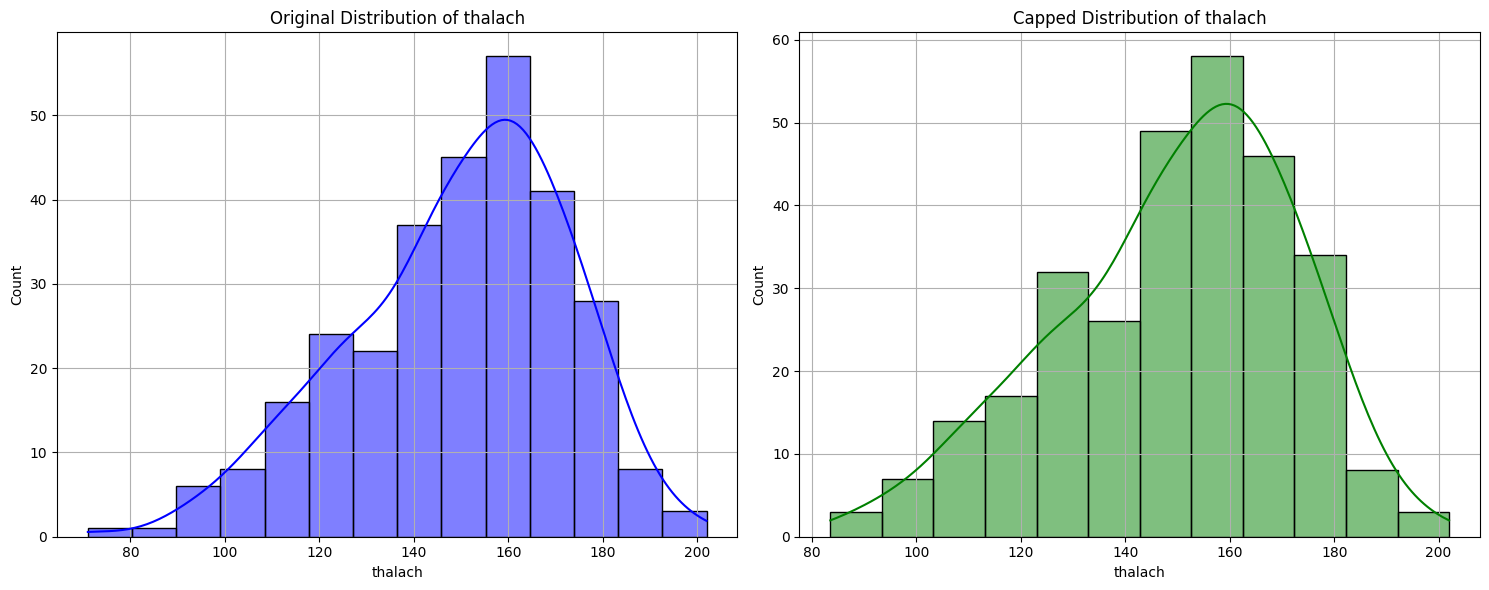

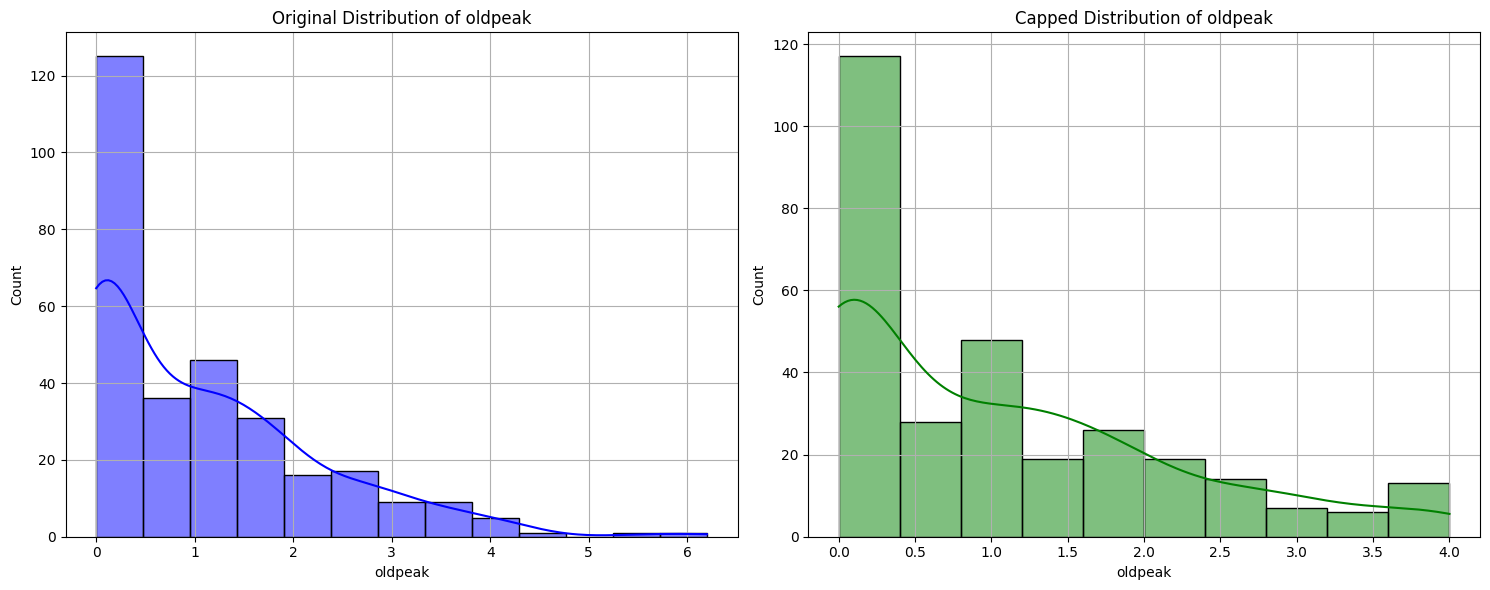

In [14]:
#  compare the original and capped distributions for each numerical feature
for col in numerical_cols:
    plt.figure(figsize=(15, 6))

    # Original Distribution
    plt.subplot(1, 2, 1)
    sns.histplot(df[col], kde=True, color='blue')
    plt.title(f'Original Distribution of {col}')
    plt.grid(True)

    # Capped Distribution
    plt.subplot(1, 2, 2)
    sns.histplot(df_capped[col], kde=True, color='green')
    plt.title(f'Capped Distribution of {col}')
    plt.grid(True)

    plt.tight_layout()
    plt.savefig(f'comparison_{col}.png')
    plt.show()

# **Normalization**

In [15]:

# Define which features to normalize (continuous numerical features)
features_to_normalize = ['age', 'trestbps', 'chol', 'thalach', 'oldpeak']

# Create a copy of the original dataset to preserve raw data
df_normalized = df_capped.copy()

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the selected features
df_normalized[features_to_normalize] = scaler.fit_transform(df[features_to_normalize])

# Optional: Save to a new CSV
df_normalized.to_csv("heart_cleveland_normalized.csv", index=False)

# Show the first few rows
print(df_normalized.head())


        age  sex  cp  trestbps      chol  fbs  restecg   thalach  exang  \
0  1.600302    1   0  1.596266 -0.257179    1        2 -0.812095      0   
1  1.600302    0   0  0.468418 -0.160859    0        0  0.061157      0   
2  1.268242    0   0  1.032342 -0.411292    0        0 -1.554358      0   
3  1.157555    1   0  0.355633  0.667499    1        2  1.065396      0   
4  1.046868    1   0 -1.223355 -0.700254    0        2 -0.244481      1   

    oldpeak  slope  ca  thal  condition  
0 -0.820813      1   1     0          0  
1  0.639470      0   2     0          0  
2  1.326662      2   0     0          0  
3  0.295874      1   1     0          1  
4  0.639470      1   0     0          0  


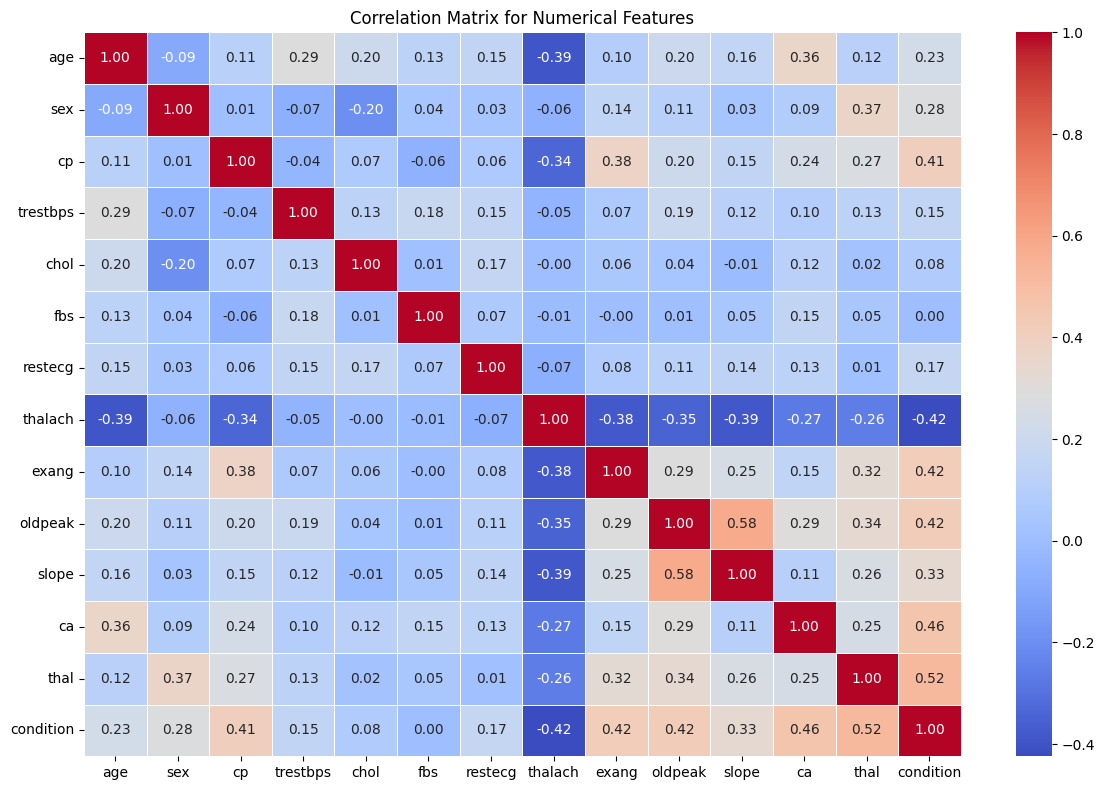

In [16]:
#correlation matrix to see the correlations and dependancies between features

correlation_matrix = df_normalized.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
correlation_matrix['condition'].sort_values(ascending=False)
plt.title('Correlation Matrix for Numerical Features')
plt.tight_layout()
plt.show()

In [17]:

# provide an ordered list of correlation values with the target (condition)
print(correlation_matrix['condition'].sort_values(ascending=False))

condition    1.000000
thal         0.520516
ca           0.463189
oldpeak      0.424052
exang        0.421355
cp           0.408945
slope        0.333049
sex          0.278467
age          0.227075
restecg      0.166343
trestbps     0.153490
chol         0.080285
fbs          0.003167
thalach     -0.423817
Name: condition, dtype: float64


# Feature Engineering

In [18]:
# # Create a new feature combining the most correlated variables
# def create_heart_risk_score(df):
#     # Scale positive correlations positively and negative correlations negatively
#     heart_risk_score = (
#         0.5 * df['thal'] +          # Higher thal value increases risk (0.52 correlation)
#         0.45 * df['ca'] +           # Higher ca value increases risk (0.46 correlation)
#         0.4 * df['oldpeak'] +       # Higher oldpeak increases risk (0.42 correlation)
#         0.4 * df['exang'] +         # Presence of exang increases risk (0.42 correlation)
#         0.4 * df['cp'] +            # Higher cp value relates to risk (0.41 correlation)
#         -0.4 * df['thalach']        # Lower thalach increases risk (-0.42 correlation)
#     )
    
#     return heart_risk_score

In [19]:
# df_normalized['heart_risk_score'] = create_heart_risk_score(df_normalized)

In [20]:
# def create_metabolic_risk_score(df):
#     # Create non-linear transformations and interactions
#     # 1. Log transform cholesterol (to handle skew)
#     # 2. Create interaction between cholesterol and fbs
#     # 3. Create threshold effects
    
#     import numpy as np
    
#     # Log transform for cholesterol (adding 1 to avoid log(0))
#     log_chol = np.log1p(df['chol'])
    
#     # Create interaction term between cholesterol and fbs
#     # This captures cases where both are elevated
#     chol_fbs_interaction = df['chol'] * df['fbs']
    
#     # Create threshold effect for cholesterol
#     # Medical literature suggests 240 mg/dL is a common threshold
#     high_chol = (df['chol'] > 240).astype(int) * 2
    
#     # Combine them into a new feature
#     metabolic_risk = log_chol + chol_fbs_interaction + high_chol
    
#     return metabolic_risk


# df_normalized['metabolic_risk'] = create_metabolic_risk_score(df_normalized)


In [21]:
# df_normalized=df_normalized.drop(columns=['chol','fbs'])

In [22]:
# df_normalized.info()

In [23]:
# df_normalized['metabolic_risk'].fillna(df_normalized['metabolic_risk'].mean(), inplace=True)
# df_normalized.info()

In [24]:
# #correlation matrix to see the correlations and dependancies between features

# correlation_matrix = df_normalized.corr(numeric_only=True)
# plt.figure(figsize=(12, 8))
# sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
# correlation_matrix['condition'].sort_values(ascending=False)
# plt.title('Correlation Matrix for Numerical Features')
# plt.tight_layout()
# plt.show()
# # provide an ordered list of correlation values with the target (condition)
# print(correlation_matrix['condition'].sort_values(ascending=False))

Text(0, 0.5, 'Counts of unique values')

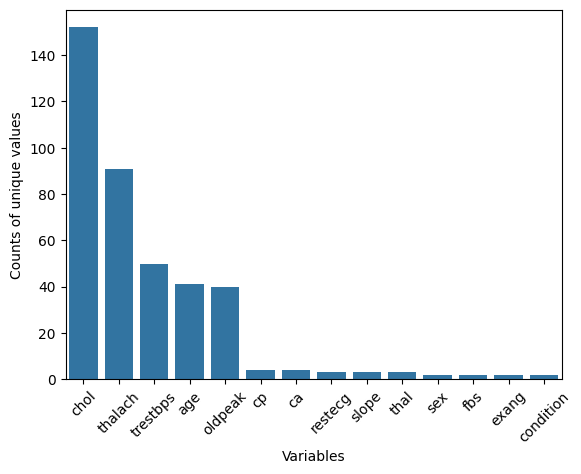

In [25]:
## Count of unique value of each features
unique_val = df_normalized.nunique().sort_values(ascending=False)
plt.xticks(rotation = 45)
sns.barplot(x = unique_val.index, y = unique_val.values)
plt.xlabel("Variables")
plt.ylabel("Counts of unique values")

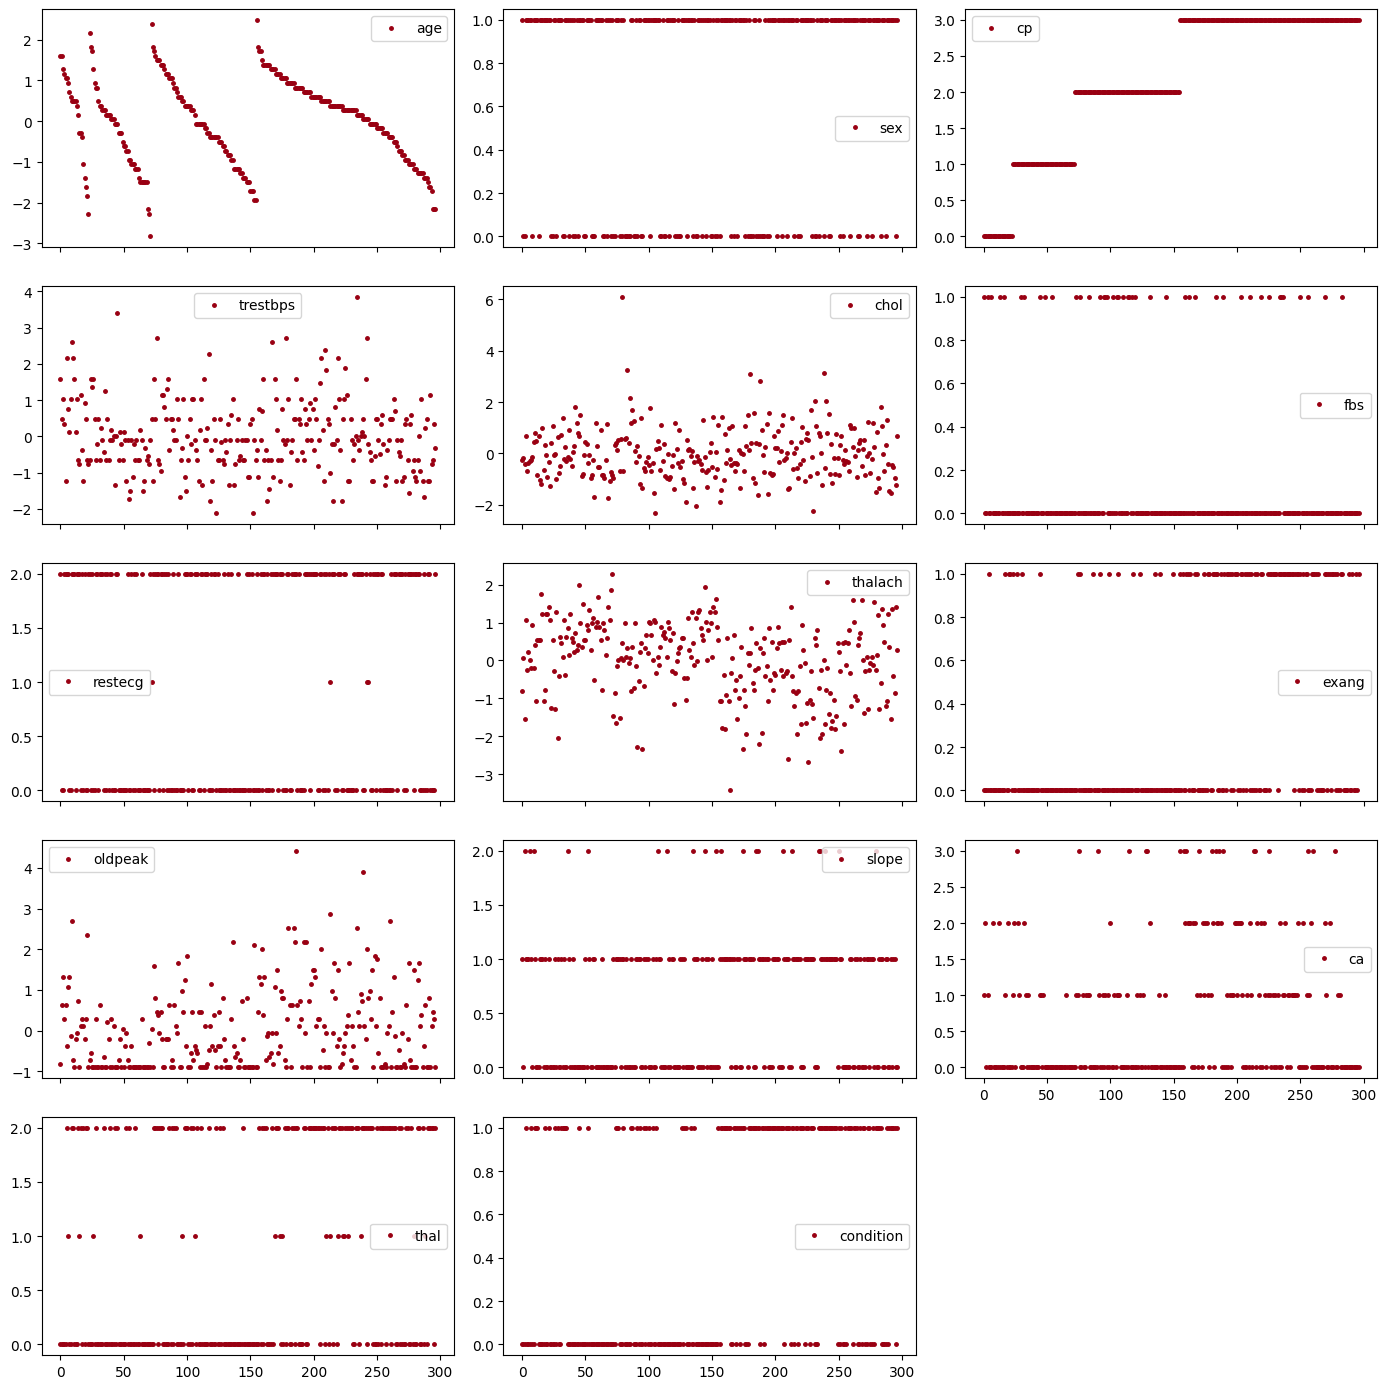

In [26]:
## Check data distribution of each features
df_normalized.plot(lw=0, marker=".", subplots=True, layout=(-1, 3), figsize=(14,14), markersize=5,color='#990012')
plt.tight_layout()

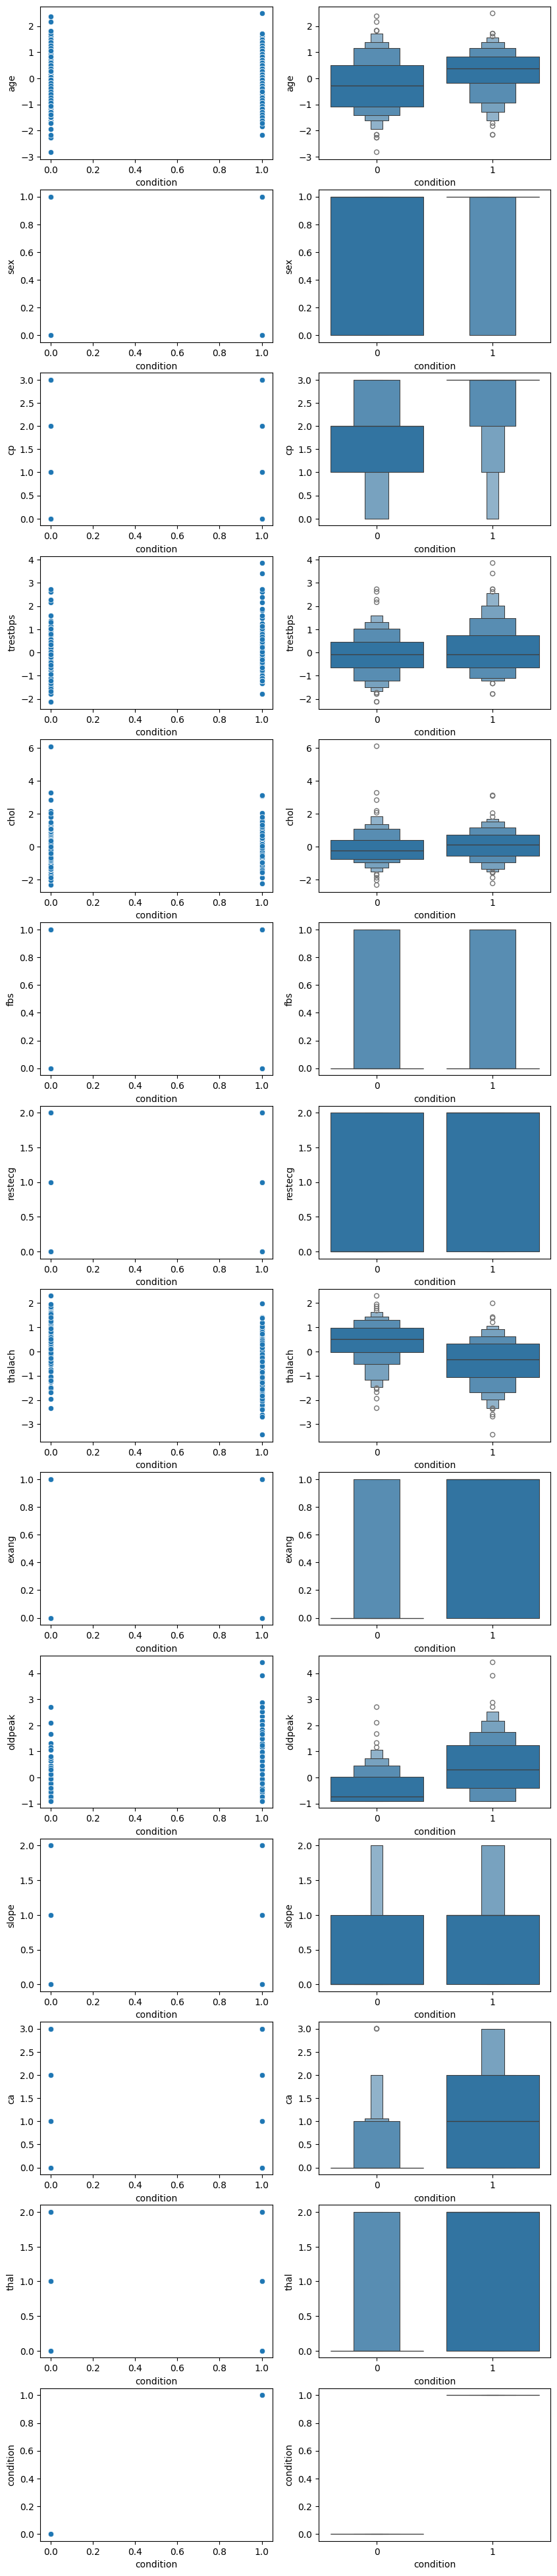

In [27]:
## Check data distribution of each features against target feature
fig, ax = plt.subplots(len(df_normalized.columns),2, figsize = (10,50))
k = 0
for col in df_normalized.columns:

    sns.scatterplot(x = df_normalized.condition, y = df_normalized[col], ax=ax[k,0])
    sns.boxenplot(x = df_normalized.condition, y = df_normalized[col], ax = ax[k,1])
    k+=1

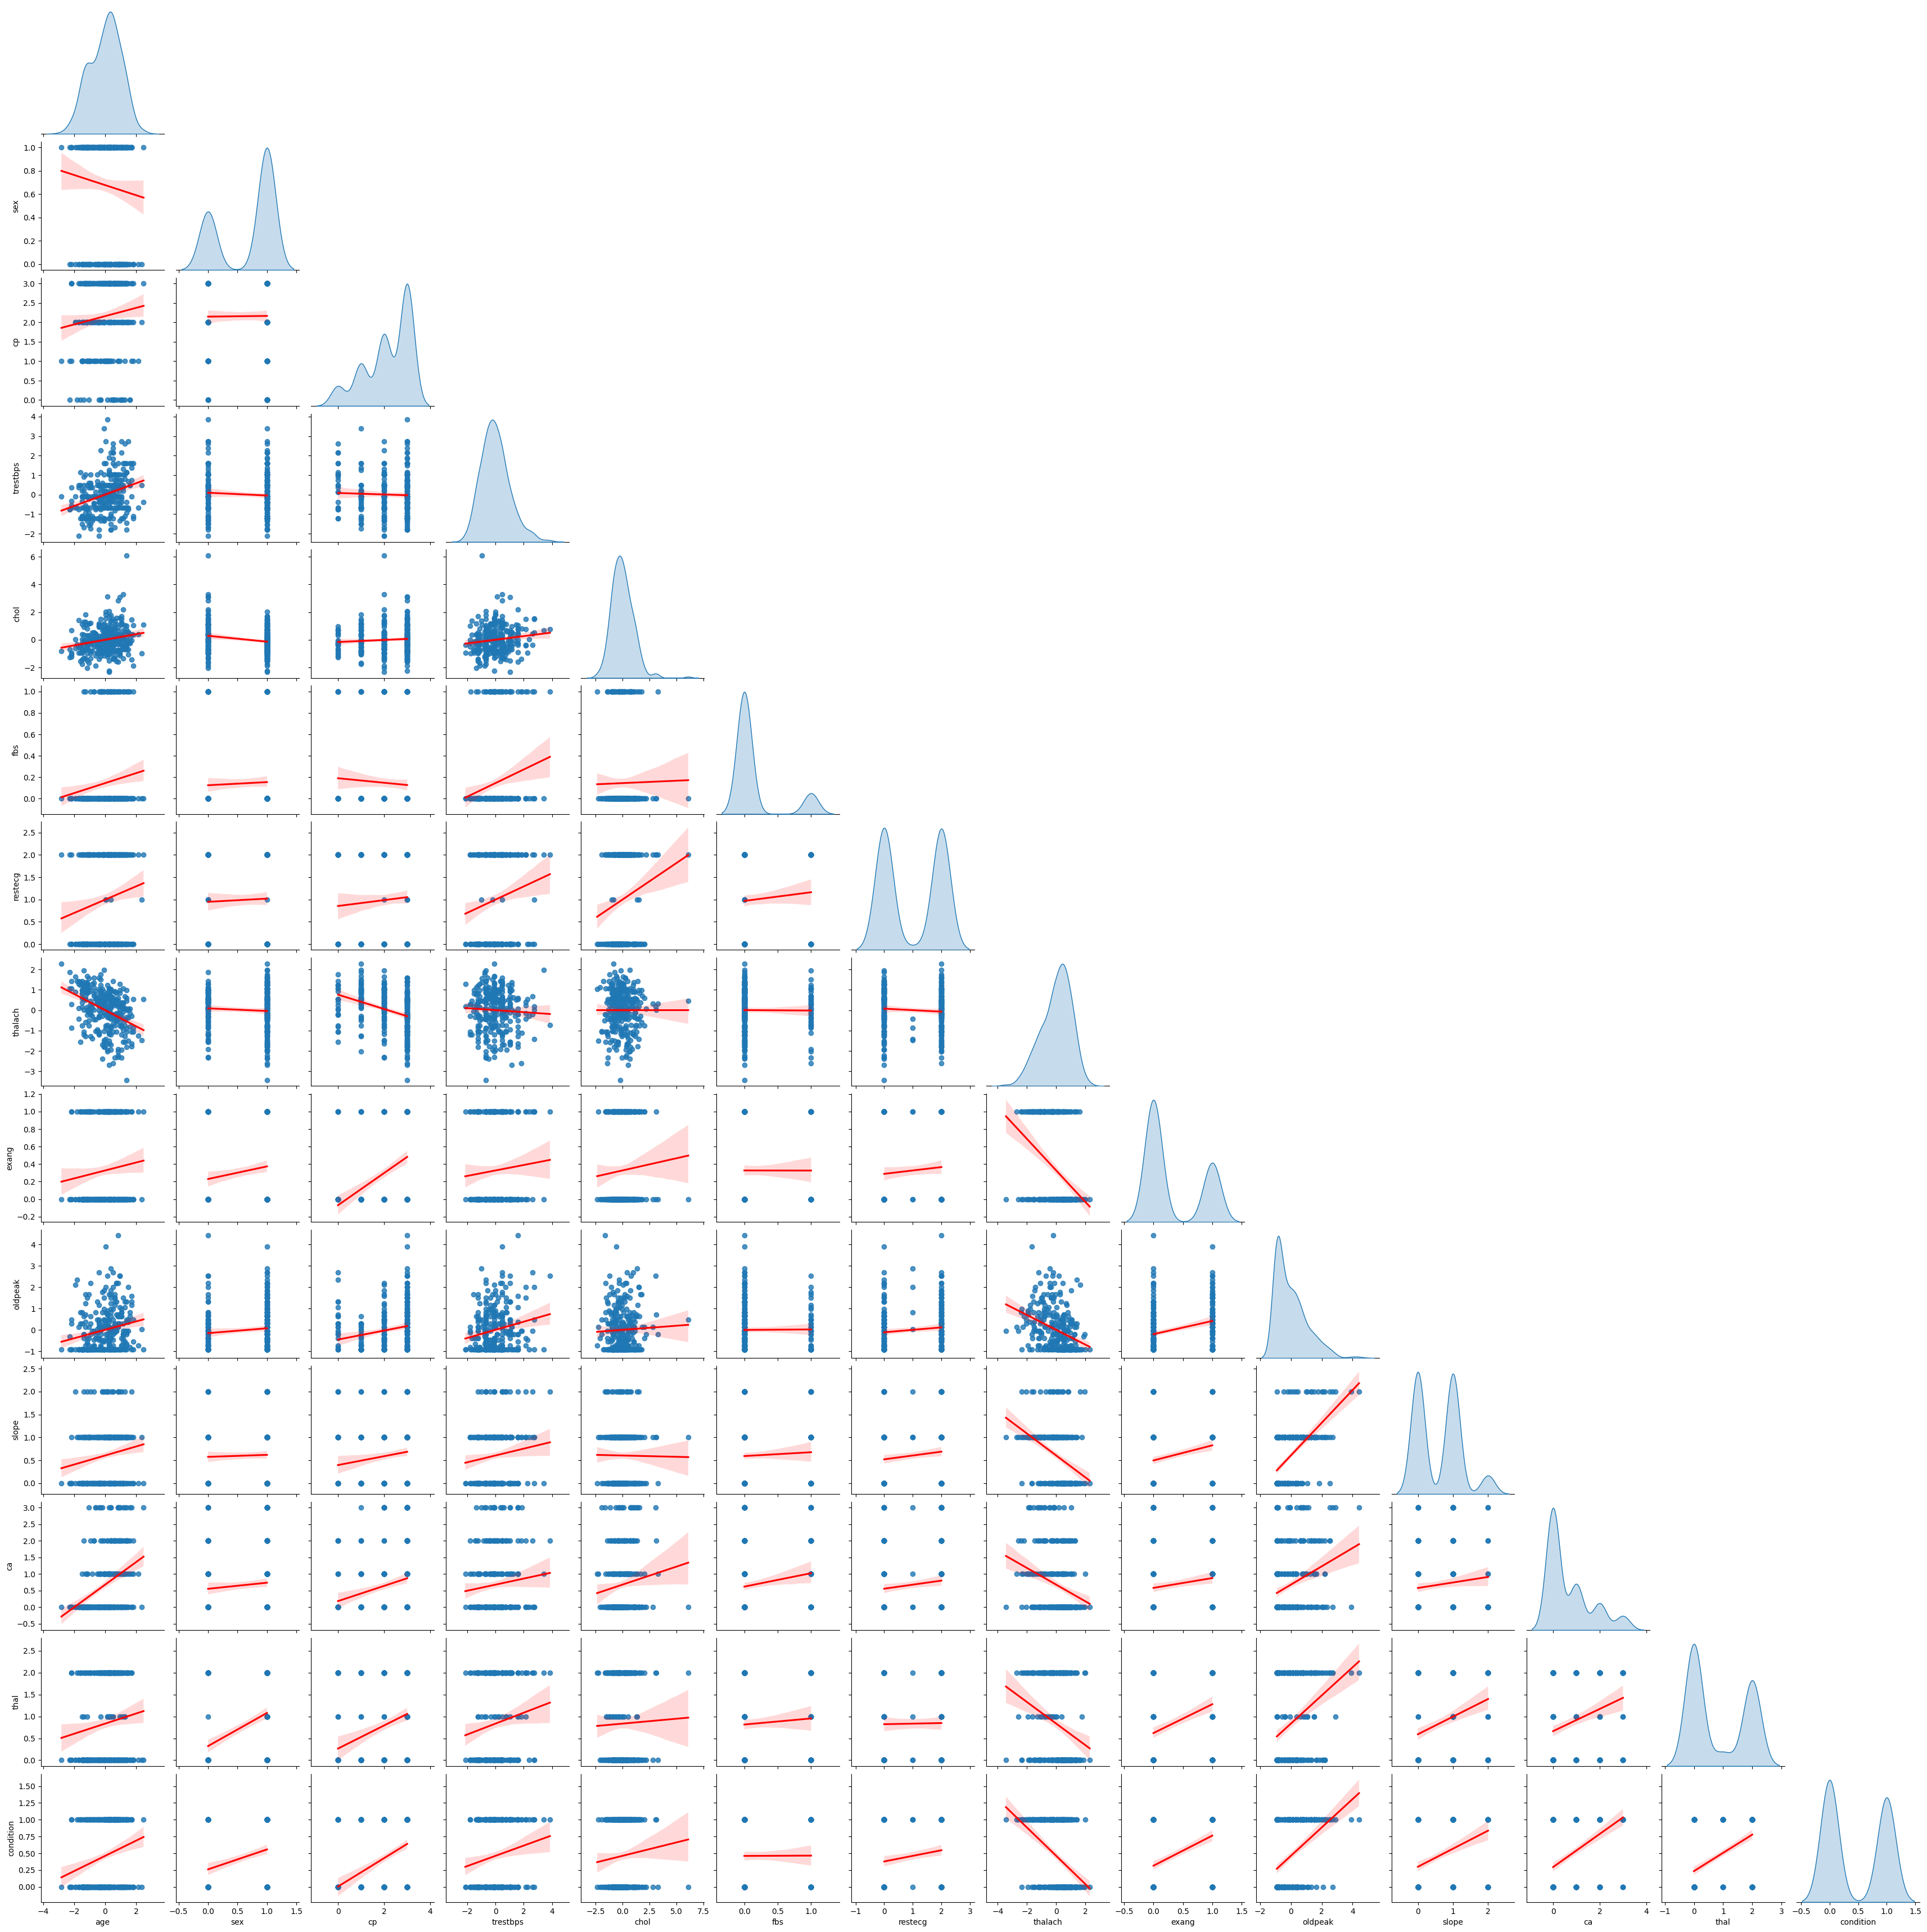

In [28]:
## check co-relation of each features
sns.pairplot(df_normalized, kind='reg', diag_kind='kde', plot_kws={'line_kws':{'color':'red'}},corner=True)

# **Splitting and Testing**

In [29]:
# Define input features (X) and target (y)
X = df_normalized.drop("condition", axis=1)
y = df_normalized["condition"]

# Split the data into 70% training and 30% temp (which will be split into dev and test)
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# Split the 30% temp data into 15% dev and 15% test
X_dev, X_test, y_dev, y_test = train_test_split(
    X_temp, y_temp, test_size=0.50, random_state=42, stratify=y_temp
)

# Print shapes of each split
print("Training set:", X_train.shape, y_train.shape)
print("Development (dev) set:", X_dev.shape, y_dev.shape)
print("Test set:", X_test.shape, y_test.shape)


Training set: (207, 13) (207,)
Development (dev) set: (45, 13) (45,)
Test set: (45, 13) (45,)


# **Neural Network Setup (PyTorch)**

In [30]:
def set_seed(seed=42):
    np.random.seed(seed)
    random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.cuda.manual_seed_all(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = False

set_seed(42)

In [31]:
# Convert data to PyTorch tensors
X_train_tensor = torch.tensor(X_train.values, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train.values, dtype=torch.long)
X_dev_tensor=torch.tensor(X_dev.values,dtype=torch.float32)
y_dev_tensor = torch.tensor(y_dev.values, dtype=torch.long)
X_test_tensor = torch.tensor(X_test.values, dtype=torch.float32)
y_test_tensor = torch.tensor(y_test.values, dtype=torch.long)

In [32]:
# Create DataLoader
train_dataset = TensorDataset(X_train_tensor, y_train_tensor)
dev_dataset=TensorDataset(X_dev_tensor,y_dev_tensor)
test_dataset = TensorDataset(X_test_tensor, y_test_tensor)

train_loader = DataLoader(train_dataset, batch_size=128, shuffle=True)
dev_loader = DataLoader(dev_dataset, batch_size=128, shuffle=True)

test_loader = DataLoader(test_dataset, batch_size=128, shuffle=False)

In [33]:
y.unique()

array([0, 1])

In [34]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [35]:
import torch
import torch.nn as nn
import torch.nn.functional as F

class HeartDiseaseNN(nn.Module):
    def __init__(self, input_dim, dropout_rate=0.1):
        super(HeartDiseaseNN, self).__init__()
        # First layer
        self.fc1 = nn.Linear(input_dim, 128)
        self.bn1 = nn.BatchNorm1d(128)
        self.dropout1 = nn.Dropout(dropout_rate)
        
        # Second layer
        self.fc2 = nn.Linear(128, 64)
        self.bn2 = nn.BatchNorm1d(64)
        self.dropout2 = nn.Dropout(dropout_rate)
        
        # Third layer
        self.fc3 = nn.Linear(64, 32)
        self.bn3 = nn.BatchNorm1d(32)
        self.dropout3 = nn.Dropout(dropout_rate)
        
        # Output layer
        self.out = nn.Linear(32, 2)    # two logits for binary classification
    
    def forward(self, x):
        # Layer 1: Linear -> BatchNorm -> ReLU -> Dropout
        x = self.fc1(x)
        #x = self.bn1(x)
        x = F.relu(x)
        x = self.dropout1(x)
        
        # Layer 2: Linear -> BatchNorm -> ReLU -> Dropout
        x = self.fc2(x)
       
        #x = self.bn2(x)
        x = F.relu(x)
        x = self.dropout2(x)
        
        # Layer 3: Linear -> BatchNorm -> ReLU -> Dropout
        x = self.fc3(x)
       # x = self.bn3(x)
        x = F.relu(x)
        x = self.dropout3(x)
        
        # Output layer
        logits = self.out(x)
        return logits
    
    def predict_proba(self, x):
        logits = self.forward(x)
        return F.softmax(logits, dim=1)
        
    def predict(self, x):
        probs = self.predict_proba(x)
        return torch.argmax(probs, dim=1)

# Initialize model
input_dim = X_train.shape[1]
model = HeartDiseaseNN(input_dim, dropout_rate=0.2).to(device)

# Loss & optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=1e-3)

In [36]:
# Sample input
sample_input = X_train_tensor[:5].to(device)

#Forward pass
logits = model.forward(sample_input)
print("Logits from forward pass:")
print(logits)

#Predict probabilities
probabilities = model.predict_proba(sample_input)
print("\nProbabilities from predict_proba:")
print(probabilities)

#Predict class labels
predictions = model.predict(sample_input)
print("\nPredictions from predict:")
print(predictions)


Logits from forward pass:
tensor([[-0.0663, -0.1124],
        [-0.1029, -0.0888],
        [-0.1371, -0.0900],
        [-0.1691, -0.1414],
        [-0.1358, -0.0302]], grad_fn=<AddmmBackward0>)

Probabilities from predict_proba:
tensor([[0.4839, 0.5161],
        [0.4735, 0.5265],
        [0.4823, 0.5177],
        [0.4841, 0.5159],
        [0.4792, 0.5208]], grad_fn=<SoftmaxBackward0>)

Predictions from predict:
tensor([1, 1, 1, 1, 1])


In [37]:
# Training the model
n_epochs = 100
train_losses = []

for epoch in range(n_epochs):
    model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        output = model(X_batch)
        loss = criterion(output, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()
    avg_loss = epoch_loss / len(train_loader)
    train_losses.append(avg_loss)
    if (epoch+1) % 10 == 0:
        print(f"Epoch {epoch+1}/{n_epochs}, Loss: {avg_loss:.4f}")

Epoch 10/100, Loss: 0.5688
Epoch 20/100, Loss: 0.4042
Epoch 30/100, Loss: 0.3969
Epoch 40/100, Loss: 0.3450
Epoch 50/100, Loss: 0.3368
Epoch 60/100, Loss: 0.2772
Epoch 70/100, Loss: 0.2615
Epoch 80/100, Loss: 0.2368
Epoch 90/100, Loss: 0.2331
Epoch 100/100, Loss: 0.1676



Development Accuracy: 86.67%


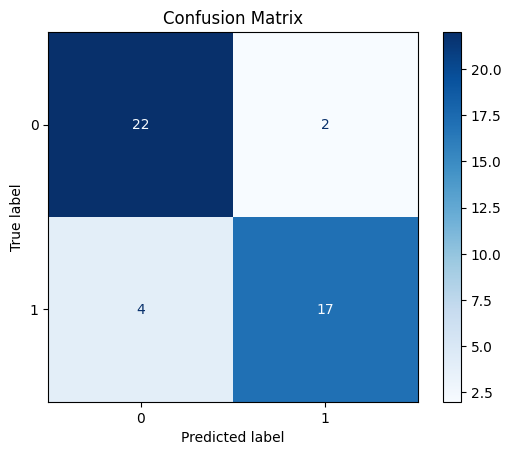


Test Accuracy: 91.11%


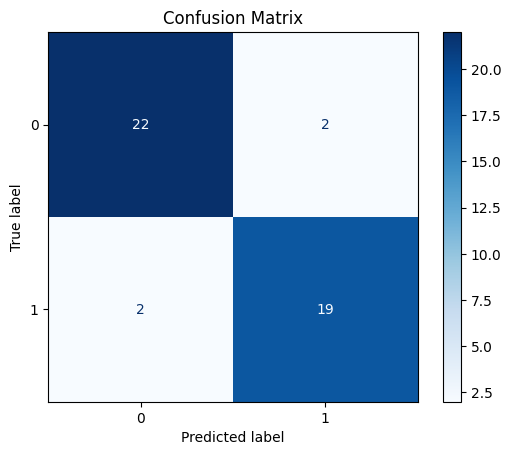

In [38]:
# Evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_dev_tensor)
    y_pred_classes = torch.argmax(y_pred, dim=1)

# Accuracy
acc = accuracy_score(y_dev_tensor, y_pred_classes)
print(f"\nDevelopment Accuracy: {acc * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_dev_tensor, y_pred_classes)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_classes = torch.argmax(y_pred, dim=1)

# Accuracy
acc = accuracy_score(y_test_tensor, y_pred_classes)
print(f"\nTest Accuracy: {acc * 100:.2f}%")

# Confusion matrix
cm = confusion_matrix(y_test_tensor, y_pred_classes)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

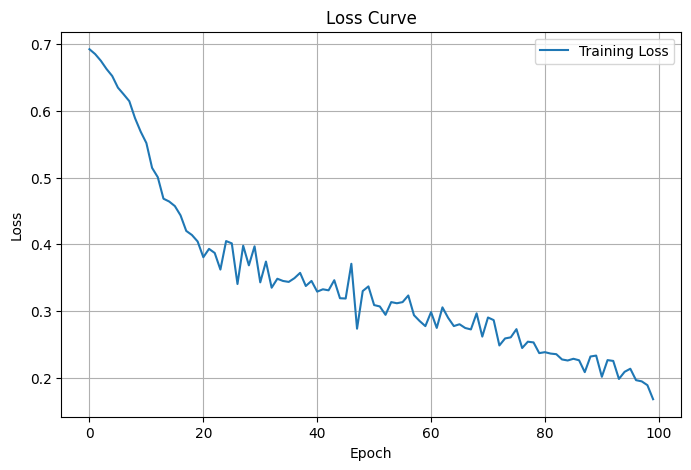

In [39]:
# Plot loss curve
plt.figure(figsize=(8, 5))
plt.plot(train_losses, label='Training Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Loss Curve')
plt.legend()
plt.grid(True)
plt.show()

# SVM

Support vector machines (SVMs) are a set of supervised learning methods used for classification, regression and outliers detection.

The advantages of support vector machines are:

* Effective in high dimensional spaces.

* Still effective in cases where number of dimensions is greater than the number of samples.

* Uses a subset of training points in the decision function (called support vectors), so it is also memory efficient.

* Versatile: different Kernel functions can be specified for the decision function. Common kernels are provided, but it is also possible to specify custom kernels.

The disadvantages of support vector machines include:

* If the number of features is much greater than the number of samples, avoid over-fitting in choosing Kernel functions and regularization term is crucial.

Train Set Accuracy: 0.8841
Development Set Accuracy: 0.8667
Test Set Accuracy: 0.8889


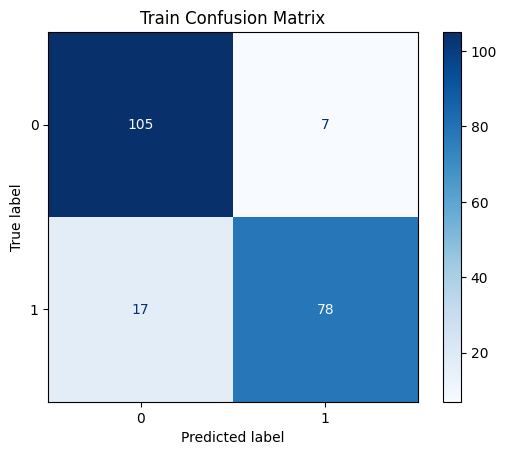

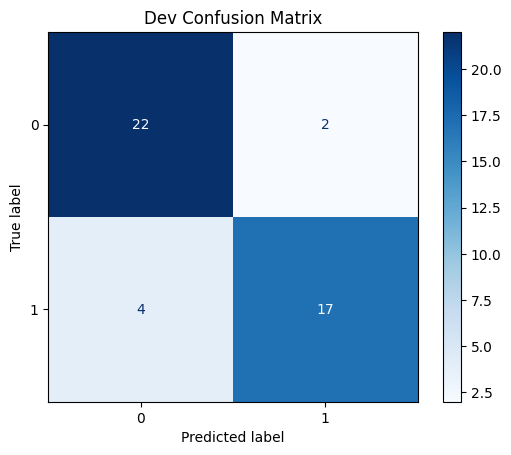

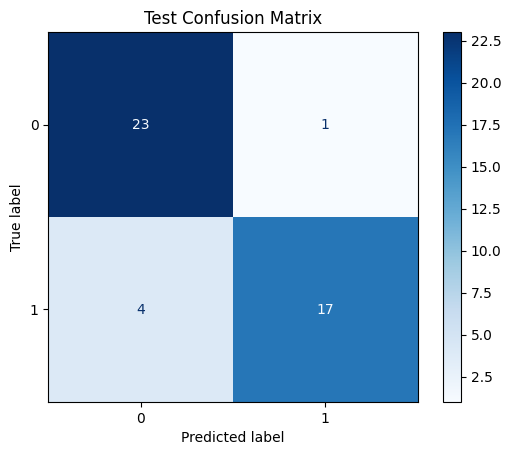

In [40]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

# Train the SVM
clf = SVC(gamma='auto')
clf.fit(X_train, y_train)

# Predictions
y_train_pred=clf.predict(X_train)
y_dev_pred = clf.predict(X_dev)
y_test_pred = clf.predict(X_test)

# Calculate and print accuracies
train_accuracy=accuracy_score(y_train,y_train_pred)
dev_accuracy = accuracy_score(y_dev, y_dev_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Train Set Accuracy: {train_accuracy:.4f}")
print(f"Development Set Accuracy: {dev_accuracy:.4f}")
print(f"Test Set Accuracy: {test_accuracy:.4f}")


# Confusion matrix
cm = confusion_matrix(y_train, y_train_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title('Train Confusion Matrix')
plt.show()
# Confusion matrix
cm = confusion_matrix(y_dev, y_dev_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title('Dev Confusion Matrix')
plt.show()
# Confusion matrix
cm = confusion_matrix(y_test, y_test_pred)
ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues')
plt.title('Test Confusion Matrix')
plt.show()

## Checking if our model is generalizing well

In [41]:
from sklearn.model_selection import cross_val_score, KFold

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(clf, X, y, cv=kf, scoring='accuracy')

# Print results
print("SVM 10-Fold Cross-Validation Scores:")
for i, score in enumerate(scores, 1):
    print(f" Fold {i}: {score:.4f}")

print(f"\nMean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")



SVM 10-Fold Cross-Validation Scores:
 Fold 1: 0.8333
 Fold 2: 0.6333
 Fold 3: 0.9333
 Fold 4: 0.8000
 Fold 5: 0.9000
 Fold 6: 0.8667
 Fold 7: 0.8667
 Fold 8: 0.8966
 Fold 9: 0.7586
 Fold 10: 0.8276

Mean Accuracy: 0.8316
Standard Deviation: 0.0821


0.83 is an unbiased output that truly shows how good our model is

# I don't like the scores we got time to optimize

## Optuna optimization

In [42]:
import optuna
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import numpy as np

# Define an objective function to be maximized by Optuna
def objective(trial):
    # Define the hyperparameters to optimize
    kernel = trial.suggest_categorical('kernel', ['linear', 'poly', 'rbf', 'sigmoid'])
    C = trial.suggest_float('C', 0.1, 100.0, log=True)
    
    # Parameters specific to certain kernels
    if kernel == 'poly':
        degree = trial.suggest_int('degree', 2, 5)
    else:
        degree = 3  # Default value, won't be used for non-poly kernels
        
    if kernel in ['poly', 'rbf', 'sigmoid']:
        gamma = trial.suggest_categorical('gamma', ['scale', 'auto'])
    else:
        gamma = 'scale'  # Default value, won't be used for linear kernel
    
    # Create and train the model with the suggested hyperparameters
    if kernel == 'poly':
        clf = SVC(kernel=kernel, C=C, degree=degree, gamma=gamma, random_state=42)
    else:
        clf = SVC(kernel=kernel, C=C, gamma=gamma, random_state=42)
    
    clf.fit(X_train, y_train)
    
    # Evaluate on the development set
    y_dev_pred = clf.predict(X_dev)
    dev_accuracy = accuracy_score(y_dev, y_dev_pred)
    
    return dev_accuracy




In [43]:
# Create the study and optimize
def optimize_svm(n_trials=100):
    study = optuna.create_study(direction='maximize')
    study.optimize(objective, n_trials=n_trials)
    
    print("Best trial:")
    trial = study.best_trial
    print(f"  Value (Dev Accuracy): {trial.value:.4f}")
    print("  Params: ")
    for key, value in trial.params.items():
        print(f"    {key}: {value}")
    
    # Train the best model
    best_params = trial.params
    
    if 'degree' in best_params and best_params['kernel'] == 'poly':
        best_model = SVC(
            kernel=best_params['kernel'],
            C=best_params['C'],
            degree=best_params['degree'],
            gamma=best_params['gamma'],
            random_state=42
        )
    else:
        best_model = SVC(
            kernel=best_params['kernel'],
            C=best_params['C'],
            gamma=best_params.get('gamma', 'scale'),
            random_state=42
        )
    
    best_model.fit(X_train, y_train)
    
    # Evaluate on all sets
    y_train_pred = best_model.predict(X_train)
    y_dev_pred = best_model.predict(X_dev)
    y_test_pred = best_model.predict(X_test)
    
    train_accuracy = accuracy_score(y_train, y_train_pred)
    dev_accuracy = accuracy_score(y_dev, y_dev_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"Best Model Accuracies:")
    print(f"  Train Set Accuracy: {train_accuracy:.4f}")
    print(f"  Development Set Accuracy: {dev_accuracy:.4f}")
    
    print(f"  Test Set Accuracy: {test_accuracy:.4f}")
    
    # Plot confusion matrices
    plt.figure(figsize=(15, 5))
    
    plt.subplot(1, 3, 1)
    cm = confusion_matrix(y_train, y_train_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues', ax=plt.gca())
    plt.title('Train Confusion Matrix')
    
    plt.subplot(1, 3, 2)
    cm = confusion_matrix(y_dev, y_dev_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues', ax=plt.gca())
    plt.title('Dev Confusion Matrix')
    
    plt.subplot(1, 3, 3)
    cm = confusion_matrix(y_test, y_test_pred)
    ConfusionMatrixDisplay(confusion_matrix=cm).plot(cmap='Blues', ax=plt.gca())
    plt.title('Test Confusion Matrix')
    
    plt.tight_layout()
    plt.show()
    
    # Optuna visualization
    plt.figure(figsize=(10, 8))
    optuna.visualization.matplotlib.plot_param_importances(study)
    plt.title('Parameter Importances')
    plt.tight_layout()
    plt.show()
    
    plt.figure(figsize=(10, 8))
    optuna.visualization.matplotlib.plot_optimization_history(study)
    plt.title('Optimization History')
    plt.tight_layout()
    plt.show()
    
    return best_model, study

[I 2025-05-04 05:31:41,613] A new study created in memory with name: no-name-2e82fcf5-38ce-4ac7-99cc-8c66baaec55f
[I 2025-05-04 05:31:41,625] Trial 0 finished with value: 0.8 and parameters: {'kernel': 'rbf', 'C': 67.67109199064689, 'gamma': 'auto'}. Best is trial 0 with value: 0.8.
[I 2025-05-04 05:31:41,634] Trial 1 finished with value: 0.7777777777777778 and parameters: {'kernel': 'poly', 'C': 1.5414758889962537, 'degree': 5, 'gamma': 'scale'}. Best is trial 0 with value: 0.8.
[I 2025-05-04 05:31:41,643] Trial 2 finished with value: 0.6666666666666666 and parameters: {'kernel': 'sigmoid', 'C': 3.9837678176017017, 'gamma': 'scale'}. Best is trial 0 with value: 0.8.
[I 2025-05-04 05:31:41,651] Trial 3 finished with value: 0.6444444444444445 and parameters: {'kernel': 'sigmoid', 'C': 45.48521600449931, 'gamma': 'auto'}. Best is trial 0 with value: 0.8.
[I 2025-05-04 05:31:41,661] Trial 4 finished with value: 0.8666666666666667 and parameters: {'kernel': 'rbf', 'C': 0.23145754505548494,

Best trial:
  Value (Dev Accuracy): 0.8889
  Params: 
    kernel: poly
    C: 0.5049545953375967
    degree: 2
    gamma: scale
Best Model Accuracies:
  Train Set Accuracy: 0.8647
  Development Set Accuracy: 0.8889
  Test Set Accuracy: 0.9111


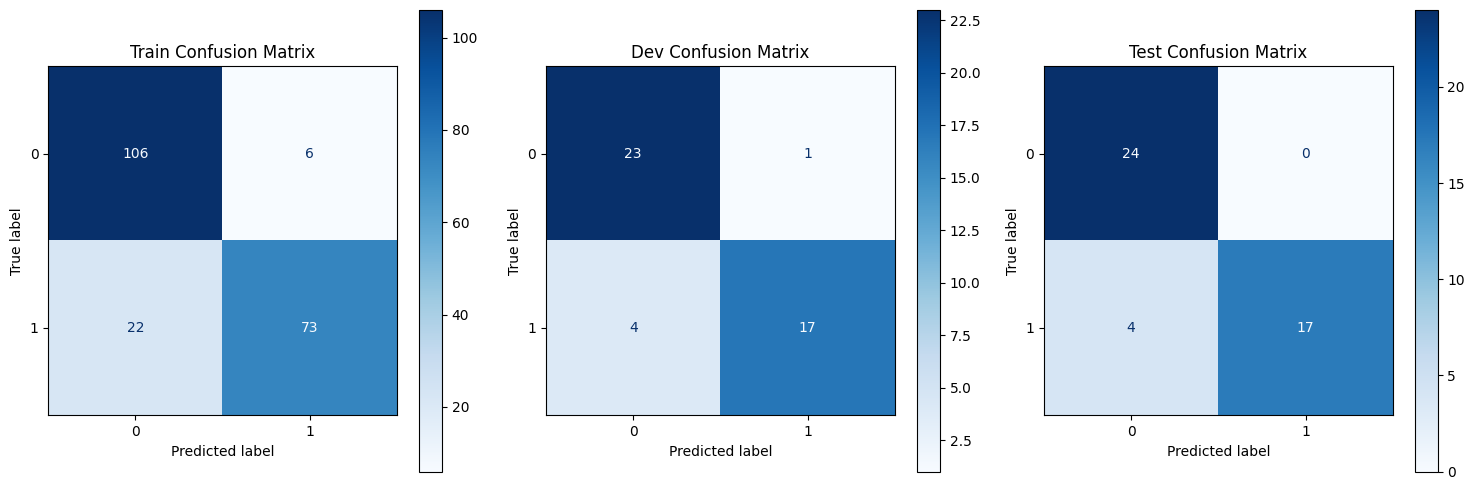

/tmp/ipykernel_13/2511339179.py:72: ExperimentalWarning: plot_param_importances is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_param_importances(study)


<Figure size 1000x800 with 0 Axes>

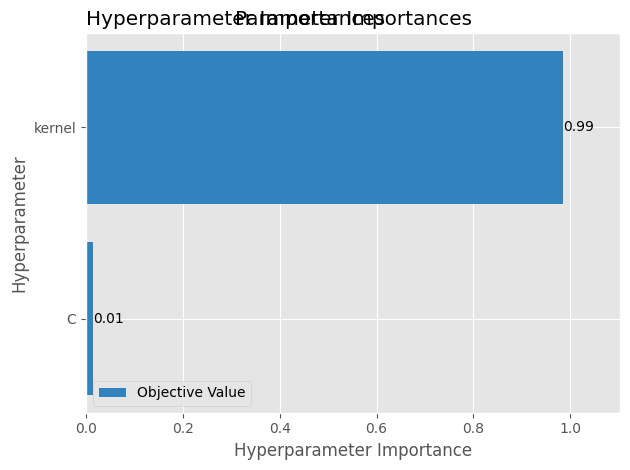

/tmp/ipykernel_13/2511339179.py:78: ExperimentalWarning: plot_optimization_history is experimental (supported from v2.2.0). The interface can change in the future.
  optuna.visualization.matplotlib.plot_optimization_history(study)


<Figure size 1000x800 with 0 Axes>

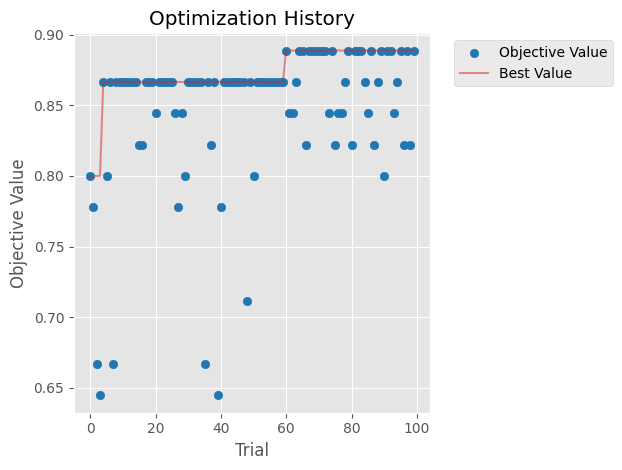

In [44]:
# Run the optimization
best_model, study = optimize_svm(n_trials=100)  

## Trying K-fold after optimization

In [45]:
from sklearn.model_selection import cross_val_score, KFold

# Set up 10-fold cross-validation
kf = KFold(n_splits=10, shuffle=True, random_state=42)

# Perform cross-validation
scores = cross_val_score(best_model, X, y, cv=kf, scoring='accuracy')

# Print results
print("SVM 10-Fold Cross-Validation Scores:")
for i, score in enumerate(scores, 1):
    print(f" Fold {i}: {score:.4f}")

print(f"\nMean Accuracy: {np.mean(scores):.4f}")
print(f"Standard Deviation: {np.std(scores):.4f}")



SVM 10-Fold Cross-Validation Scores:
 Fold 1: 0.9000
 Fold 2: 0.6333
 Fold 3: 0.9000
 Fold 4: 0.8000
 Fold 5: 0.9000
 Fold 6: 0.8667
 Fold 7: 0.8667
 Fold 8: 0.8966
 Fold 9: 0.7586
 Fold 10: 0.8276

Mean Accuracy: 0.8349
Standard Deviation: 0.0814


got better but still not good enough

# Model Comparison and analysis

In [46]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Fix the neural network evaluation
model.eval()
with torch.no_grad():
    y_pred = model(X_test_tensor)
    y_pred_classes = torch.argmax(y_pred, dim=1)
    
# Calculate metrics for neural network
nn_accuracy = accuracy_score(y_test_tensor.cpu().numpy(), y_pred_classes.cpu().numpy())
nn_precision = precision_score(y_test_tensor.cpu().numpy(), y_pred_classes.cpu().numpy(), average='weighted')
nn_recall = recall_score(y_test_tensor.cpu().numpy(), y_pred_classes.cpu().numpy(), average='weighted')
nn_f1 = f1_score(y_test_tensor.cpu().numpy(), y_pred_classes.cpu().numpy(), average='weighted')

print(f"\nNeural Network Metrics:")
print(f"Accuracy: {nn_accuracy * 100:.2f}%")
print(f"Precision: {nn_precision * 100:.2f}%")
print(f"Recall: {nn_recall * 100:.2f}%")
print(f"F1 Score: {nn_f1 * 100:.2f}%")

# SVM evaluation
y_test_pred = best_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, y_test_pred)
svm_precision = precision_score(y_test, y_test_pred, average='weighted')
svm_recall = recall_score(y_test, y_test_pred, average='weighted')
svm_f1 = f1_score(y_test, y_test_pred, average='weighted')

print(f"\nSVM Metrics:")
print(f"Accuracy: {svm_accuracy * 100:.2f}%")
print(f"Precision: {svm_precision * 100:.2f}%")
print(f"Recall: {svm_recall * 100:.2f}%")
print(f"F1 Score: {svm_f1 * 100:.2f}%")




Neural Network Metrics:
Accuracy: 91.11%
Precision: 91.11%
Recall: 91.11%
F1 Score: 91.11%

SVM Metrics:
Accuracy: 91.11%
Precision: 92.38%
Recall: 91.11%
F1 Score: 90.99%


In [47]:
# Create a DataFrame for easy comparison
import pandas as pd
metrics = ['Accuracy', 'Precision', 'Recall', 'F1 Score']
nn_scores = [nn_accuracy, nn_precision, nn_recall, nn_f1]
svm_scores = [svm_accuracy, svm_precision, svm_recall, svm_f1]

df_comparison = pd.DataFrame({
    'Metric': metrics,
    'Neural Network': nn_scores,
    'SVM': svm_scores
})
print("\nComparison Table:")
print(df_comparison)



Comparison Table:
      Metric  Neural Network       SVM
0   Accuracy        0.911111  0.911111
1  Precision        0.911111  0.923810
2     Recall        0.911111  0.911111
3   F1 Score        0.911111  0.909852


## Visualizations

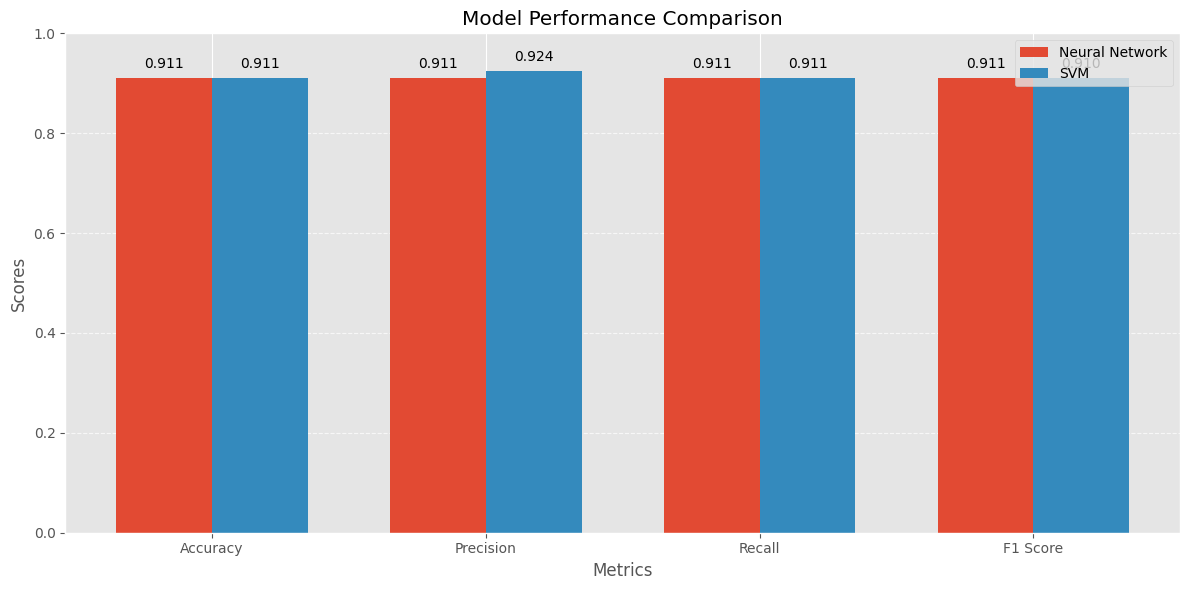

In [48]:

# 1. Bar chart comparison of metrics
plt.figure(figsize=(12, 6))
x = np.arange(len(metrics))
width = 0.35

plt.bar(x - width/2, nn_scores, width, label='Neural Network')
plt.bar(x + width/2, svm_scores, width, label='SVM')

plt.xlabel('Metrics')
plt.ylabel('Scores')
plt.title('Model Performance Comparison')
plt.xticks(x, metrics)
plt.ylim(0, 1.0)
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)

for i, v in enumerate(nn_scores):
    plt.text(i - width/2, v + 0.02, f'{v:.3f}', ha='center')
    
for i, v in enumerate(svm_scores):
    plt.text(i + width/2, v + 0.02, f'{v:.3f}', ha='center')

plt.tight_layout()
plt.savefig('model_metrics_comparison.png')
plt.show()


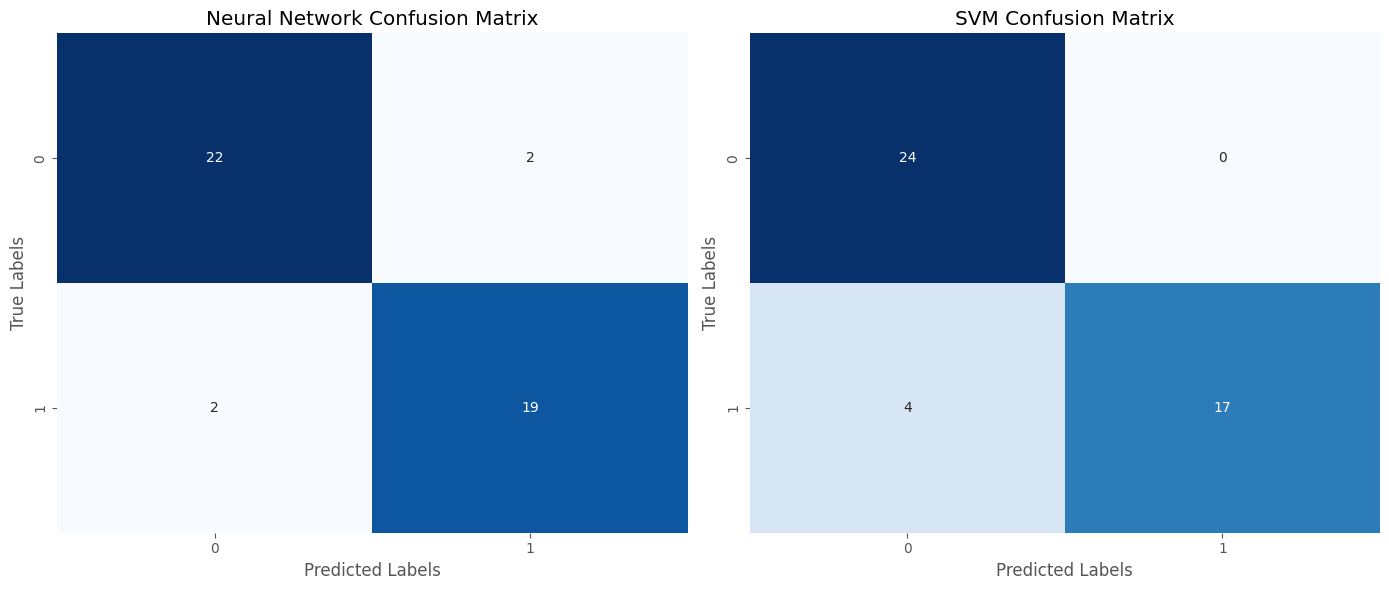

In [49]:
# 2. Confusion matrices
plt.figure(figsize=(14, 6))

# Neural Network Confusion Matrix
plt.subplot(1, 2, 1)
nn_cm = confusion_matrix(y_test_tensor.cpu().numpy(), y_pred_classes.cpu().numpy())
sns.heatmap(nn_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Neural Network Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

# SVM Confusion Matrix
plt.subplot(1, 2, 2)
svm_cm = confusion_matrix(y_test, y_test_pred)
sns.heatmap(svm_cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('SVM Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

plt.tight_layout()
plt.savefig('confusion_matrices.png')
plt.show()


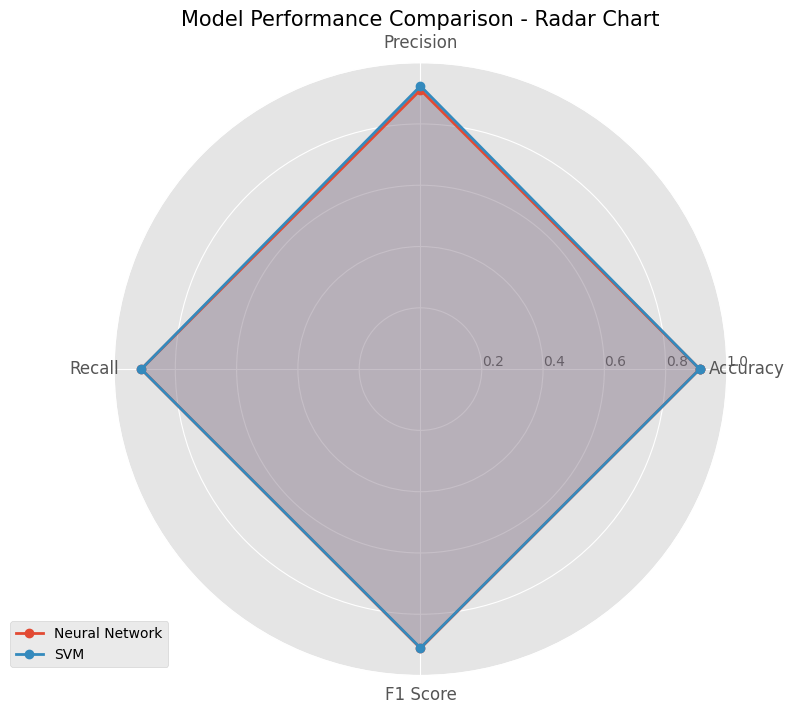

In [50]:
# 3. Radar chart for visual comparison
def radar_chart(categories, values1, values2, model1_name, model2_name):
    N = len(categories)
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Close the loop
    
    values1 += values1[:1]  # Close the loop for NN
    values2 += values2[:1]  # Close the loop for SVM
    
    fig, ax = plt.subplots(figsize=(8, 8), subplot_kw=dict(polar=True))
    
    # Draw one axis per variable and add labels
    plt.xticks(angles[:-1], categories, size=12)
    
    # Draw ylabels
    ax.set_rlabel_position(0)
    plt.yticks([0.2, 0.4, 0.6, 0.8, 1.0], ["0.2", "0.4", "0.6", "0.8", "1.0"], size=10)
    plt.ylim(0, 1)
    
    # Plot data
    ax.plot(angles, values1, 'o-', linewidth=2, label=model1_name)
    ax.fill(angles, values1, alpha=0.25)
    
    ax.plot(angles, values2, 'o-', linewidth=2, label=model2_name)
    ax.fill(angles, values2, alpha=0.25)
    
    # Add legend
    plt.legend(loc='upper right', bbox_to_anchor=(0.1, 0.1))
    plt.title('Model Performance Comparison - Radar Chart', size=15)
    
    return fig

radar_fig = radar_chart(
    categories=metrics,
    values1=nn_scores,
    values2=svm_scores,
    model1_name='Neural Network',
    model2_name='SVM'
)

plt.tight_layout()
plt.savefig('radar_comparison.png')
plt.show()


In [51]:
# 4. Classification report
print("\nNeural Network Classification Report:")
print(classification_report(y_test_tensor.cpu().numpy(), y_pred_classes.cpu().numpy()))

print("\nSVM Classification Report:")
print(classification_report(y_test, y_test_pred))


Neural Network Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.92      0.92        24
           1       0.90      0.90      0.90        21

    accuracy                           0.91        45
   macro avg       0.91      0.91      0.91        45
weighted avg       0.91      0.91      0.91        45


SVM Classification Report:
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        24
           1       1.00      0.81      0.89        21

    accuracy                           0.91        45
   macro avg       0.93      0.90      0.91        45
weighted avg       0.92      0.91      0.91        45

